In [7]:
import sys, importlib.util
print(sys.executable)
print(importlib.util.find_spec("cupy"))

/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/.venv/bin/python
ModuleSpec(name='cupy', loader=<_frozen_importlib_external.SourceFileLoader object at 0x72f8ba3f4830>, origin='/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/.venv/lib/python3.12/site-packages/cupy/__init__.py', submodule_search_locations=['/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/.venv/lib/python3.12/site-packages/cupy'])


In [4]:
from cuml.ensemble import RandomForestRegressor

In [6]:
from air_quality_preprocessor_forecasting import AirQualityPreprocessor
import pandas as pd

In [3]:
df = pd.read_csv('Solicitud_Historica/Historico_pm25_filtered.csv', sep=';')

h=0

# # Rename the first column to 'Fecha_Hora'
# df.rename(columns={df.columns[0]: 'Fecha_Hora'}, inplace=True)

# # Convert 'Fecha_Hora' to datetime
# df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%d/%m/%y %H:%M')
# df=df[[
#     'Fecha_Hora',
#     'pm25','calidad_pm25',
#     'nox', 'calidad_nox',
#     'vviento_ssr', 'calidad_vviento_ssr',
#     'no2', 'calidad_no2',
#     'no', 'calidad_no',
#     'haire10_ssr', 'calidad_haire10_ssr'
#     ]]

# df=df[[
#     'Fecha_Hora',
#     'pm25','calidad_pm25',
#     'nox', 'calidad_nox',
#     'no2', 'calidad_no2',
#     'no', 'calidad_no',
#     ]]

# df=df[[
#     'Fecha_Hora',
#     'pm25','calidad_pm25',
#     ]]

In [4]:
df.head()

,Fecha_Hora,BAR-TORR__PM2.5,COP-CVID__PM2.5,BEL-FEVE__PM2.5,MED-ARAN__PM2.5,MED-SCRI__PM2.5,MED-VILL__PM2.5,CEN-TRAF__PM2.5,MED-BEME__PM2.5,MED-SELE__PM2.5,MED-ALTA__PM2.5,MED-TESO__PM2.5,ITA-CJUS__PM2.5,MED-LAYE__PM2.5,ITA-CONC__PM2.5,ENV-HOSP__PM2.5,EST-HOSP__PM2.5,SAB-RAME__PM2.5,CAL-JOAR__PM2.5
0,2019-01-01 00:00:00,93.6646,NaN,188.8740,198.4560,108.4140,57.8790,115.0,67.1179,NaN,77.0134,26.6834,171.0,17.0,79.0,44.5809,28.0,62.7140,NaN
1,2019-01-01 01:00:00,50.3542,NaN,110.1980,134.0200,70.1561,49.1590,79.0,58.6878,NaN,36.6871,23.0106,198.0,22.0,74.0,44.5023,19.0,44.5194,NaN
2,2019-01-01 02:00:00,35.0655,NaN,94.8215,83.9968,44.2872,59.9013,59.0,50.2286,NaN,39.0220,20.5705,160.0,11.0,56.0,44.4149,27.0,45.7275,NaN
3,2019-01-01 03:00:00,29.1859,NaN,73.6579,59.0683,41.7584,74.1180,58.0,53.7066,NaN,36.6138,20.5436,155.0,22.0,37.0,41.9547,31.0,58.8523,31.6231
4,2019-01-01 04:00:00,27.9737,NaN,44.3655,43.6580,25.7170,58.4576,63.0,39.3297,NaN,27.0872,19.2904,115.0,21.0,43.0,35.9086,22.0,85.0434,29.0643


In [5]:
# # Make sure timestamp is datetime
# df["Fecha_Hora"] = pd.to_datetime(df["Fecha_Hora"])

train_start = "2019-01-01"
train_end   = "2021-12-31"

test_start  = "2022-01-01"
test_end    = "2023-12-31"

val_start   = "2024-01-01"
val_end     = "2024-12-31"

mask_train = (df["Fecha_Hora"] >= train_start) & (df["Fecha_Hora"] <= train_end)
mask_test  = (df["Fecha_Hora"] >= test_start)  & (df["Fecha_Hora"] <= test_end)
mask_val   = (df["Fecha_Hora"] >= val_start)   & (df["Fecha_Hora"] <= val_end)

df_train = df.loc[mask_train].copy()
df_test  = df.loc[mask_test].copy()
df_val   = df.loc[mask_val].copy()

## BAR-TORR

In [6]:
preproc = AirQualityPreprocessor(
    target_col="BAR-TORR__PM2.5",      # or any other station column
    quality_col=None,           # <-- no quality column in this dataset
    datetime_col="Fecha_Hora",  # the time column in your file
    freq='1H',                  # or "1H" if you want to enforce hourly frequency
    horizon=0,                 # pm25_lag1..24 and lags for other numeric vars
    lag_other_cols=None,        # None = lag all numeric columns except target
    missing_col_threshold=0.5, # or e.g. 0.5 to drop very sparse columns
    rolling_windows=None,
    lags=None,
    use_cyclical_time=False
)


# VERY IMPORTANT: fit ONLY on training data (2019–2021)
preproc.fit(df_train)

Target prefix: BAR-TORR
Station columns: ['BAR-TORR__PM2.5']
Selected columns: ['BAR-TORR__PM2.5', 'COP-CVID__PM2.5', 'BEL-FEVE__PM2.5', 'MED-ARAN__PM2.5', 'MED-SCRI__PM2.5', 'MED-VILL__PM2.5', 'CEN-TRAF__PM2.5', 'MED-BEME__PM2.5', 'MED-SELE__PM2.5', 'MED-ALTA__PM2.5', 'MED-TESO__PM2.5', 'ITA-CJUS__PM2.5', 'MED-LAYE__PM2.5', 'ITA-CONC__PM2.5', 'ENV-HOSP__PM2.5', 'EST-HOSP__PM2.5', 'SAB-RAME__PM2.5', 'CAL-JOAR__PM2.5']


/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor_forecasting.py:93: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq(self.freq)


AirQualityPreprocessor(datetime_col='Fecha_Hora', freq='1H', lags=None,
                       missing_col_threshold=0.5, rolling_windows=None,
                       target_col='BAR-TORR__PM2.5', use_cyclical_time=False)

In [7]:
preproc.feature_cols_

['COP-CVID__PM2.5',
 'BEL-FEVE__PM2.5',
 'MED-ARAN__PM2.5',
 'MED-SCRI__PM2.5',
 'MED-VILL__PM2.5',
 'CEN-TRAF__PM2.5',
 'MED-BEME__PM2.5',
 'MED-SELE__PM2.5',
 'MED-ALTA__PM2.5',
 'MED-TESO__PM2.5',
 'ITA-CJUS__PM2.5',
 'MED-LAYE__PM2.5',
 'ITA-CONC__PM2.5',
 'ENV-HOSP__PM2.5',
 'EST-HOSP__PM2.5',
 'SAB-RAME__PM2.5',
 'CAL-JOAR__PM2.5']

In [8]:
# Train
X_train, y_train, mask_train_valid, idx_train = preproc.transform(df_train)
X_train = X_train[mask_train_valid]
y_train = y_train[mask_train_valid]

# Test (2022–2023)
X_test, y_test, mask_test_valid, idx_test = preproc.transform(df_test)
X_test = X_test[mask_test_valid]
y_test = y_test[mask_test_valid]

# Validation (2024)
X_val, y_val, mask_val_valid, idx_val = preproc.transform(df_val)
X_val = X_val[mask_val_valid]
y_val = y_val[mask_val_valid]


/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor_forecasting.py:93: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq(self.freq)


Target prefix: BAR-TORR
Station columns: ['BAR-TORR__PM2.5']
Selected columns: ['BAR-TORR__PM2.5', 'COP-CVID__PM2.5', 'BEL-FEVE__PM2.5', 'MED-ARAN__PM2.5', 'MED-SCRI__PM2.5', 'MED-VILL__PM2.5', 'CEN-TRAF__PM2.5', 'MED-BEME__PM2.5', 'MED-SELE__PM2.5', 'MED-ALTA__PM2.5', 'MED-TESO__PM2.5', 'ITA-CJUS__PM2.5', 'MED-LAYE__PM2.5', 'ITA-CONC__PM2.5', 'ENV-HOSP__PM2.5', 'EST-HOSP__PM2.5', 'SAB-RAME__PM2.5', 'CAL-JOAR__PM2.5']
Target prefix: BAR-TORR
Station columns: ['BAR-TORR__PM2.5']
Selected columns: ['BAR-TORR__PM2.5', 'COP-CVID__PM2.5', 'BEL-FEVE__PM2.5', 'MED-ARAN__PM2.5', 'MED-SCRI__PM2.5', 'MED-VILL__PM2.5', 'CEN-TRAF__PM2.5', 'MED-BEME__PM2.5', 'MED-SELE__PM2.5', 'MED-ALTA__PM2.5', 'MED-TESO__PM2.5', 'ITA-CJUS__PM2.5', 'MED-LAYE__PM2.5', 'ITA-CONC__PM2.5', 'ENV-HOSP__PM2.5', 'EST-HOSP__PM2.5', 'SAB-RAME__PM2.5', 'CAL-JOAR__PM2.5']
Target prefix: BAR-TORR
Station columns: ['BAR-TORR__PM2.5']
Selected columns: ['BAR-TORR__PM2.5', 'COP-CVID__PM2.5', 'BEL-FEVE__PM2.5', 'MED-ARAN__PM2.5', 

/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor_forecasting.py:93: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq(self.freq)
/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor_forecasting.py:93: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq(self.freq)


In [9]:
X_train

,BAR-TORR__PM2.5,COP-CVID__PM2.5,BEL-FEVE__PM2.5,MED-ARAN__PM2.5,MED-SCRI__PM2.5,MED-VILL__PM2.5,CEN-TRAF__PM2.5,MED-BEME__PM2.5,MED-SELE__PM2.5,MED-ALTA__PM2.5,MED-TESO__PM2.5,ITA-CJUS__PM2.5,MED-LAYE__PM2.5,ITA-CONC__PM2.5,ENV-HOSP__PM2.5,EST-HOSP__PM2.5,SAB-RAME__PM2.5,CAL-JOAR__PM2.5
Fecha_Hora,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,93.66460,NaN,188.8740,198.4560,108.41400,57.8790,115.0,67.1179,NaN,77.0134,26.6834,171.0,17.0,79.0,44.5809,28.0,62.7140,NaN
2019-01-01 01:00:00,50.35420,NaN,110.1980,134.0200,70.15610,49.1590,79.0,58.6878,NaN,36.6871,23.0106,198.0,22.0,74.0,44.5023,19.0,44.5194,NaN
2019-01-01 02:00:00,35.06550,NaN,94.8215,83.9968,44.28720,59.9013,59.0,50.2286,NaN,39.0220,20.5705,160.0,11.0,56.0,44.4149,27.0,45.7275,NaN
2019-01-01 03:00:00,29.18590,NaN,73.6579,59.0683,41.75840,74.1180,58.0,53.7066,NaN,36.6138,20.5436,155.0,22.0,37.0,41.9547,31.0,58.8523,31.6231
2019-01-01 04:00:00,27.97370,NaN,44.3655,43.6580,25.71700,58.4576,63.0,39.3297,NaN,27.0872,19.2904,115.0,21.0,43.0,35.9086,22.0,85.0434,29.0643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 19:00:00,15.05330,15.28810,13.0589,21.4211,16.24130,14.4055,31.0,11.0213,8.10789,23.3572,14.7911,38.0,21.0,16.0,18.8355,10.0,13.1121,29.0747
2021-12-30 20:00:00,18.48330,11.74890,10.6594,18.9946,19.95480,23.9562,28.0,13.4339,13.46860,19.6159,14.7527,38.0,27.0,18.0,23.5148,15.0,17.8914,25.4216
2021-12-30 21:00:00,9.21429,8.19858,NaN,20.1362,9.96155,23.8853,NaN,35.3304,5.37734,20.7632,24.5818,NaN,NaN,NaN,25.7945,NaN,16.6742,NaN


In [10]:
# features=['COP-CVID__PM2.5',
#     'BEL-FEVE__PM2.5',
#     'MED-ARAN__PM2.5',
#     'MED-SCRI__PM2.5',
# ]
features=preproc.feature_cols_
X_train = X_train[features]
X_test = X_test[features]
X_val = X_val[features]

In [11]:
y_test

array([38.0318 , 36.9079 , 23.0653 , ..., 11.46   ,  5.71612,  9.13952])

In [12]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import time

# Check if data has NaNs
print(f"NaN in X_train: {pd.isna(X_train).sum().sum()}")
print(f"NaN in X_test: {pd.isna(X_test).sum().sum()}")
print(f"NaN in X_val: {pd.isna(X_val).sum().sum()}")

# Fit imputer on training data only
imputer = SimpleImputer(strategy='median')
X_train_clean = imputer.fit_transform(X_train)
X_test_clean = imputer.transform(X_test)
X_val_clean = imputer.transform(X_val)

print(f"\nData shapes: X_train={X_train_clean.shape}, y_train={y_train.shape}")

# Train on 2019–2021 with timing
print("\n🚀 Training RandomForest...")
start_time = time.time()

rf = RandomForestRegressor(

    n_estimators=500,

    max_depth=150,

    random_state=42,# Evaluate on 2022–2023

    criterion="squared_error"

)



rf.fit(X_train_clean, y_train)

train_time = time.time() - start_time

print(f"✓ Training completed in {train_time:.2f} seconds")

y_test_pred = rf.predict(X_test_clean)

NaN in X_train: 12644
NaN in X_test: 12942
NaN in X_val: 13294

Data shapes: X_train=(24871, 17), y_train=(24871,)

🚀 Training RandomForest...
✓ Training completed in 14.54 seconds


In [13]:
y_test_pred

array([30.567402, 28.453566, 22.651285, ...,  6.942326,  8.093789,
        8.926268], dtype=float32)

In [14]:
rmse_test = root_mean_squared_error(y_test, y_test_pred)

# Evaluate on 2024
y_val_pred = rf.predict(X_val_clean)
rmse_val = root_mean_squared_error(y_val, y_val_pred)

# Evaluate R2
r2_test = r2_score(y_test, y_test_pred)
r2_val = r2_score(y_val, y_val_pred)

print("\n📊 Results:")
print(f"RMSE test (2022–2023): {rmse_test:.4f}")
print(f"RMSE val  (2024): {rmse_val:.4f}")
print(f"R2 test (2022–2023): {r2_test:.4f}")

print(f"R2 val  (2024): {r2_val:.4f}")

print(f"\n🔍 Model type: {type(rf).__module__}.{type(rf).__name__}")

# Check if cuml.accel accelerated the modelif hasattr(rf, '__module__'):


📊 Results:
RMSE test (2022–2023): 5.3474
RMSE val  (2024): 5.6286
R2 test (2022–2023): 0.4796
R2 val  (2024): 0.6622

🔍 Model type: cuml.ensemble.randomforestregressor.RandomForestRegressor


🔍 Debugging info:
  Number of features in model: 17
  Number of feature names: 17
  X_train shape: (24871, 17)


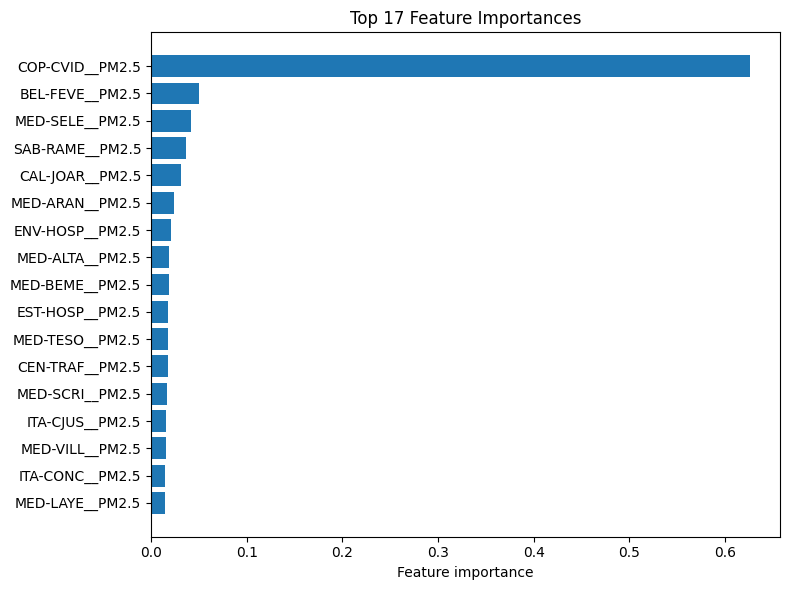

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get importances and feature names
importances = rf.feature_importances_
feature_names = preproc.feature_cols_

# DEBUG: Check for mismatch
print(f"🔍 Debugging info:")
print(f"  Number of features in model: {len(importances)}")
print(f"  Number of feature names: {len(feature_names)}")
print(f"  X_train shape: {X_train_clean.shape}")

# Ensure arrays match
if len(importances) != len(feature_names):
    print("⚠️ WARNING: Mismatch detected!")
    # Use the smaller length to be safe
    min_len = min(len(importances), len(feature_names))
    importances = importances[:min_len]
    feature_names = feature_names[:min_len]
    print(f"✓ Adjusted to {min_len} features")

# Sort by importance
indices = np.argsort(importances)[::-1]

# Get top N features
n_top = min(20, len(importances))
top_idx = indices[:n_top]

# Create plot with error handling
try:
    top_importances = importances[top_idx]
    top_features = [feature_names[i] for i in top_idx]
    
    plt.figure(figsize=(8, 6))
    plt.barh(range(n_top), top_importances[::-1])
    plt.yticks(range(n_top), top_features[::-1])
    plt.xlabel("Feature importance")
    plt.title(f"Top {n_top} Feature Importances")
    plt.tight_layout()
    plt.show()
    
except IndexError as e:
    print(f"❌ Error: {e}")
    print(f"Max index in top_idx: {max(top_idx)}")
    print(f"Feature names length: {len(feature_names)}")

In [21]:
top_features

['COP-CVID__PM2.5',
 'BEL-FEVE__PM2.5',
 'MED-SELE__PM2.5',
 'SAB-RAME__PM2.5',
 'CAL-JOAR__PM2.5',
 'MED-ARAN__PM2.5',
 'ENV-HOSP__PM2.5',
 'MED-ALTA__PM2.5',
 'MED-BEME__PM2.5',
 'EST-HOSP__PM2.5',
 'MED-TESO__PM2.5',
 'CEN-TRAF__PM2.5',
 'MED-SCRI__PM2.5',
 'ITA-CJUS__PM2.5',
 'MED-VILL__PM2.5',
 'ITA-CONC__PM2.5',
 'MED-LAYE__PM2.5']

In [19]:
preproc.feature_cols_

['COP-CVID__PM2.5',
 'BEL-FEVE__PM2.5',
 'MED-ARAN__PM2.5',
 'MED-SCRI__PM2.5',
 'MED-VILL__PM2.5',
 'CEN-TRAF__PM2.5',
 'MED-BEME__PM2.5',
 'MED-SELE__PM2.5',
 'MED-ALTA__PM2.5',
 'MED-TESO__PM2.5',
 'ITA-CJUS__PM2.5',
 'MED-LAYE__PM2.5',
 'ITA-CONC__PM2.5',
 'ENV-HOSP__PM2.5',
 'EST-HOSP__PM2.5',
 'SAB-RAME__PM2.5',
 'CAL-JOAR__PM2.5']

In [36]:
top_idx

array([ 35,   2,   4,  36,   0,   3,  57,  31,  37,  56,  14,  58,  11,
       275, 611, 179,  10,  81,  82,  55])

In [25]:
# Create an importances dataframe

importances_df=pd.DataFrame(importances, index=feature_names, columns=['Importancia'])

In [26]:
important_features=importances_df.sort_values(by='Importancia',ascending=False).head(20).index.to_list()

In [27]:
importances_df.sort_values(by='Importancia',ascending=False).head(20).index.to_list()

['num__BAR-TORR_lag1',
 'num__COP-CVID',
 'num__MED-ARAN',
 'num__BAR-TORR_lag2',
 'num__GIR-SOSN',
 'num__BEL-FEVE',
 'num__BAR-TORR_lag23',
 'num__hour_sin',
 'num__BAR-TORR_lag3',
 'num__BAR-TORR_lag22',
 'num__MED-ALTA',
 'num__BAR-TORR_lag24',
 'num__MED-BEME',
 'num__MED-ARAN_lag1',
 'num__MED-BEME_lag1',
 'num__COP-CVID_lag1',
 'num__CEN-TRAF',
 'num__BAR-TORR_lag47',
 'num__BAR-TORR_lag48',
 'num__BAR-TORR_lag21']

In [28]:
important_features_list = [feat.split('__')[-1] for feat in important_features]

In [29]:
important_features_list

['BAR-TORR_lag1',
 'COP-CVID',
 'MED-ARAN',
 'BAR-TORR_lag2',
 'GIR-SOSN',
 'BEL-FEVE',
 'BAR-TORR_lag23',
 'hour_sin',
 'BAR-TORR_lag3',
 'BAR-TORR_lag22',
 'MED-ALTA',
 'BAR-TORR_lag24',
 'MED-BEME',
 'MED-ARAN_lag1',
 'MED-BEME_lag1',
 'COP-CVID_lag1',
 'CEN-TRAF',
 'BAR-TORR_lag47',
 'BAR-TORR_lag48',
 'BAR-TORR_lag21']

In [47]:
X_train_small = X_train[:, top_idx[:15]]
X_test_small  = X_test_valid[:,  top_idx[:15]]
X_val_small   = X_val_valid[:,   top_idx[:15]]

In [48]:
rf_small = RandomForestRegressor(
    n_estimators=250,
    max_depth=150,
    random_state=42,
    criterion="squared_error",
    n_jobs=-1
)
rf_small.fit(X_train_small, y_train)

y_test_pred = rf_small.predict(X_test_small)
y_val_pred  = rf_small.predict(X_val_small)

print("Test R2 (small model):", r2_score(y_test_valid, y_test_pred))
print("Val  R2 (small model):", r2_score(y_val_valid,  y_val_pred))

print("Test RMSE (small model):",
      root_mean_squared_error(y_test_valid, y_test_pred))
print("Val  RMSE (small model):",
      root_mean_squared_error(y_val_valid,  y_val_pred))

Test R2 (small model): 0.6528046423991731
Val  R2 (small model): 0.755566766595413
Test RMSE (small model): 4.367744740820454
Val  RMSE (small model): 4.788165709819629


## COP-CVID

In [51]:
preproc_cop_cvid = AirQualityPreprocessor(
    target_col="COP-CVID",      # or any other station column
    quality_col=None,           # <-- no quality column in this dataset
    datetime_col="Fecha_Hora",  # the time column in your file
    freq='1H',                  # or "1H" if you want to enforce hourly frequency
    max_lag=48,                 # pm25_lag1..24 and lags for other numeric vars
    lag_other_cols=None,        # None = lag all numeric columns except target
    missing_col_threshold=0.5, # or e.g. 0.5 to drop very sparse columns
    scale_numeric=True,
)


# VERY IMPORTANT: fit ONLY on training data (2019–2021)
preproc_cop_cvid.fit(df_train)

/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor.py:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq(self.freq)
/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{base_col}_lag{lag}"] = df[base_col].shift(lag)
/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

AirQualityPreprocessor(datetime_col='Fecha_Hora', freq='1H', max_lag=48,
                       missing_col_threshold=0.5, target_col='COP-CVID')

In [52]:
# Train
X_train_cop_cvid, y_train_cop_cvid, mask_train_valid_cop_cvid, idx_train_cop_cvid = preproc_cop_cvid.transform(df_train)
X_train_cop_cvid = X_train_cop_cvid[mask_train_valid_cop_cvid]
y_train_cop_cvid = y_train_cop_cvid[mask_train_valid_cop_cvid]

# Test (2022–2023)
X_test_cop_cvid, y_test_cop_cvid, mask_test_valid_cop_cvid, idx_test_cop_cvid = preproc_cop_cvid.transform(df_test)
X_test_cop_cvid = X_test_cop_cvid[mask_test_valid_cop_cvid]
y_test_cop_cvid = y_test_cop_cvid[mask_test_valid_cop_cvid]

# Validation (2024)
X_val_cop_cvid, y_val_cop_cvid, mask_val_valid_cop_cvid, idx_val_cop_cvid = preproc_cop_cvid.transform(df_val)
X_val_cop_cvid = X_val_cop_cvid[mask_val_valid_cop_cvid]
y_val_cop_cvid = y_val_cop_cvid[mask_val_valid_cop_cvid]

/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor.py:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq(self.freq)
/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{base_col}_lag{lag}"] = df[base_col].shift(lag)
/home/manuel/Documents/Maestria_Analitica/Semestre_II/AQI_Predict/air_quality_preprocessor.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [53]:
feature_names_transformed_cop_cvid = preproc_cop_cvid.column_transformer_.get_feature_names_out()
print("Transformed feature names:")
for name in feature_names_transformed_cop_cvid:
    print(name)

Transformed feature names:
num__BAR-TORR
num__GIR-SOSN
num__BEL-FEVE
num__MED-ARAN
num__MED-SCRI
num__MED-FISC
num__MED-VILL
num__CEN-TRAF
num__MED-BEME
num__MED-SELE
num__MED-ALTA
num__MED-TESO
num__ITA-CJUS
num__MED-LAYE
num__ITA-CONC
num__ENV-HOSP
num__EST-HOSP
num__SUR-TRAF
num__SAB-RAME
num__CAL-LASA
num__CAL-JOAR
num__hour
num__dayofweek
num__month
num__dayofyear
num__hour_sin
num__hour_cos
num__doy_sin
num__doy_cos
num__COP-CVID_lag1
num__COP-CVID_lag2
num__COP-CVID_lag3
num__COP-CVID_lag4
num__COP-CVID_lag5
num__COP-CVID_lag6
num__COP-CVID_lag7
num__COP-CVID_lag8
num__COP-CVID_lag9
num__COP-CVID_lag10
num__COP-CVID_lag11
num__COP-CVID_lag12
num__COP-CVID_lag13
num__COP-CVID_lag14
num__COP-CVID_lag15
num__COP-CVID_lag16
num__COP-CVID_lag17
num__COP-CVID_lag18
num__COP-CVID_lag19
num__COP-CVID_lag20
num__COP-CVID_lag21
num__COP-CVID_lag22
num__COP-CVID_lag23
num__COP-CVID_lag24
num__COP-CVID_lag25
num__COP-CVID_lag26
num__COP-CVID_lag27
num__COP-CVID_lag28
num__COP-CVID_lag29
num

In [54]:
# Train on 2019–2021
rf_cop_cvid = RandomForestRegressor(
    n_estimators=250,
    max_depth=150,
    random_state=42,
    criterion="squared_error",
    n_jobs=-1
)
rf_cop_cvid.fit(X_train_cop_cvid, y_train_cop_cvid)

# Evaluate on 2022–2023
y_test_pred_cop_cvid = rf_cop_cvid.predict(X_test_cop_cvid)
rmse_test_cop_cvid = root_mean_squared_error(y_test_cop_cvid, y_test_pred_cop_cvid)
# Evaluate on 2024
y_val_pred_cop_cvid = rf_cop_cvid.predict(X_val_cop_cvid)
rmse_val_cop_cvid = root_mean_squared_error(y_val_cop_cvid, y_val_pred_cop_cvid)
print("RMSE test (2022–2023):", rmse_test_cop_cvid)
print("RMSE val  (2024):", rmse_val_cop_cvid)

# Evaluate R2
r2_test_cop_cvid = r2_score(y_test_cop_cvid, y_test_pred_cop_cvid)
r2_val_cop_cvid = r2_score(y_val_cop_cvid, y_val_pred_cop_cvid)
print("R2 test (2022–2023):", r2_test_cop_cvid)
print("R2 val  (2024):", r2_val_cop_cvid)

RMSE test (2022–2023): 4.3379219736023735
RMSE val  (2024): 4.186628418970791
R2 test (2022–2023): 0.6799147655803969
R2 val  (2024): 0.7918526864704262


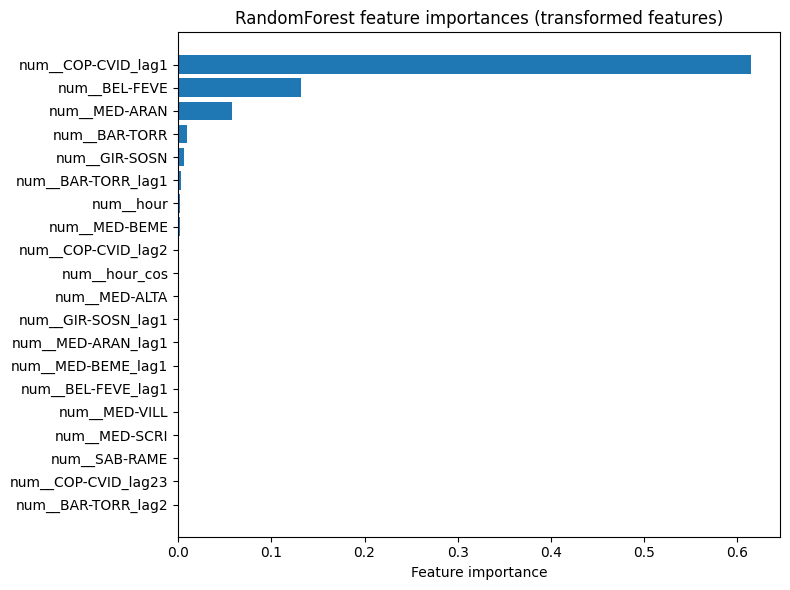

In [55]:
importances_cop_cvid = rf_cop_cvid.feature_importances_
feature_names_cop_cvid = preproc_cop_cvid.column_transformer_.get_feature_names_out()

# sort
indices_cop_cvid = np.argsort(importances_cop_cvid)[::-1]

# how many features to show
n_top = 20
top_idx_cop_cvid = indices_cop_cvid[:n_top]

plt.figure(figsize=(8, 6))
plt.barh(range(n_top), importances_cop_cvid[top_idx_cop_cvid][::-1])
plt.yticks(range(n_top), [feature_names_cop_cvid[i] for i in top_idx_cop_cvid][::-1])
plt.xlabel("Feature importance")
plt.title("RandomForest feature importances (transformed features)")
plt.tight_layout()
plt.show()

In [56]:
# Create an importances dataframe

importances_df_cop_cvid=pd.DataFrame(importances_cop_cvid, index=feature_names_cop_cvid, columns=['Importancia'])

In [57]:
important_features_cop_cvid=importances_df_cop_cvid.sort_values(by='Importancia',ascending=False).head(20).index.to_list()

In [58]:
importances_df_cop_cvid.sort_values(by='Importancia',ascending=False).head(20).index.to_list()

['num__COP-CVID_lag1',
 'num__BEL-FEVE',
 'num__MED-ARAN',
 'num__BAR-TORR',
 'num__GIR-SOSN',
 'num__BAR-TORR_lag1',
 'num__hour',
 'num__MED-BEME',
 'num__COP-CVID_lag2',
 'num__hour_cos',
 'num__MED-ALTA',
 'num__GIR-SOSN_lag1',
 'num__MED-ARAN_lag1',
 'num__MED-BEME_lag1',
 'num__BEL-FEVE_lag1',
 'num__MED-VILL',
 'num__MED-SCRI',
 'num__SAB-RAME',
 'num__COP-CVID_lag23',
 'num__BAR-TORR_lag2']

In [59]:
important_features_list_cop_cvid = [feat.split('__')[-1] for feat in important_features_cop_cvid]

In [60]:
important_features_list_cop_cvid

['COP-CVID_lag1',
 'BEL-FEVE',
 'MED-ARAN',
 'BAR-TORR',
 'GIR-SOSN',
 'BAR-TORR_lag1',
 'hour',
 'MED-BEME',
 'COP-CVID_lag2',
 'hour_cos',
 'MED-ALTA',
 'GIR-SOSN_lag1',
 'MED-ARAN_lag1',
 'MED-BEME_lag1',
 'BEL-FEVE_lag1',
 'MED-VILL',
 'MED-SCRI',
 'SAB-RAME',
 'COP-CVID_lag23',
 'BAR-TORR_lag2']

In [61]:
X_train_small_cop_cvid = X_train_cop_cvid[:, top_idx_cop_cvid[:15]]
X_test_small_cop_cvid  = X_test_cop_cvid[:,  top_idx_cop_cvid[:15]]
X_val_small_cop_cvid   = X_val_cop_cvid[:,   top_idx_cop_cvid[:15]]

In [62]:
rf_small_cop_cvid = RandomForestRegressor(
    n_estimators=250,
    max_depth=150,
    random_state=42,
    criterion="squared_error",
    n_jobs=-1
)
rf_small_cop_cvid.fit(X_train_small_cop_cvid, y_train_cop_cvid)

y_test_pred_cop_cvid = rf_small_cop_cvid.predict(X_test_small_cop_cvid)
y_val_pred_cop_cvid  = rf_small_cop_cvid.predict(X_val_small_cop_cvid)

print("Test R2 (small model):", r2_score(y_test_cop_cvid, y_test_pred_cop_cvid))
print("Val  R2 (small model):", r2_score(y_val_cop_cvid,  y_val_pred_cop_cvid))
print("Test RMSE (small model):",
      root_mean_squared_error(y_test_cop_cvid, y_test_pred_cop_cvid))
print("Val  RMSE (small model):",
      root_mean_squared_error(y_val_cop_cvid,  y_val_pred_cop_cvid))

Test R2 (small model): 0.6762065700451655
Val  R2 (small model): 0.7926445954372917
Test RMSE (small model): 4.36297708442229
Val  RMSE (small model): 4.178656689767312


/tmp/ipykernel_890192/2228523338.py:23: RuntimeWarning: divide by zero encountered in divide
  period = np.where(freq > 0, 1 / freq, np.nan)


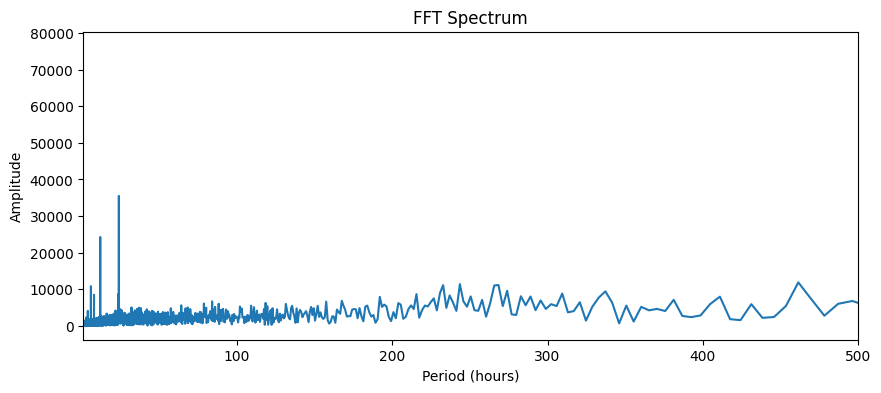

Top periods (hours): [8.76800000e+03 4.38400000e+03 2.63040000e+04 2.92266667e+03
 2.40000000e+01 1.31520000e+04 5.26080000e+03 1.20000000e+01
 2.19200000e+03 2.39127273e+03]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load + train split (same ranges as your script)
df = pd.read_csv("siata_merged_data.csv", sep=";")
df["Fecha_Hora"] = pd.to_datetime(df["Fecha_Hora"], format="%Y-%m-%d %H:%M:%S")
df = df.sort_values("Fecha_Hora").set_index("Fecha_Hora")
train = df.loc["2019-01-01":"2021-12-31"]

y = train["BAR-TORR__PM2.5"].astype(float).replace(-9999, np.nan)
y = y.asfreq("1h")  # use your freq
y = y.interpolate(limit_direction="both")  # simple fill for FFT stability
y = y - y.mean()  # remove DC component

# FFT
n = len(y)
fft = np.fft.rfft(y.values)
freq = np.fft.rfftfreq(n, d=1.0)  # d=1 hour
power = np.abs(fft)

# Convert frequency to period (hours), avoid division by zero at freq=0
period = np.where(freq > 0, 1 / freq, np.nan)

plt.figure(figsize=(10,4))
plt.plot(period, power)
plt.xlim(1, 500)  # focus on 1..500 hours
plt.xlabel("Period (hours)")
plt.ylabel("Amplitude")
plt.title("FFT Spectrum")
plt.show()

# Top periods
top_idx = np.argsort(power[1:])[::-1][:10] + 1
print("Top periods (hours):", period[top_idx])


## Seasonal normalization (train-only)

This section estimates seasonal components from the training split only, then removes them from train/test/val to inspect residual structure and potential model targets.


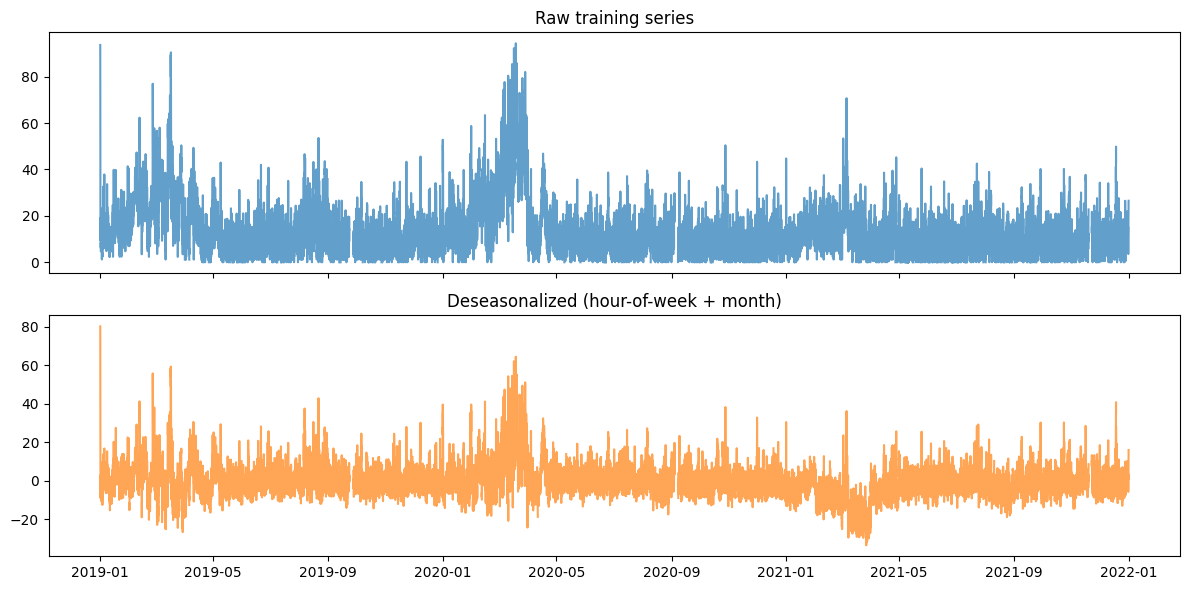

Seasonal baseline RMSE (test): 7.508074561035316
Seasonal baseline RMSE (val): 7.651065823310785


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET_COL = 'BAR-TORR__PM2.5'
DATETIME_COL = 'Fecha_Hora'
FREQ = '1h'
TRAIN_START, TRAIN_END = '2019-01-01', '2021-12-31'
TEST_START, TEST_END = '2022-01-01', '2023-12-31'
VAL_START, VAL_END = '2024-01-01', '2024-12-31'

if 'df' not in globals():
    df = pd.read_csv('siata_merged_data.csv', sep=';')
    df[DATETIME_COL] = pd.to_datetime(df[DATETIME_COL], format='%Y-%m-%d %H:%M:%S')
    df = df.sort_values(DATETIME_COL).set_index(DATETIME_COL)

y = df[TARGET_COL].replace(-9999, np.nan).astype(float)
y = y.asfreq(FREQ)

train = y.loc[TRAIN_START:TRAIN_END]
test = y.loc[TEST_START:TEST_END]
val = y.loc[VAL_START:VAL_END]

def _build_seasonal_profiles(train_series: pd.Series):
    idx = train_series.index
    how = idx.dayofweek * 24 + idx.hour
    month = idx.month
    temp = pd.DataFrame({'y': train_series.values, 'how': how, 'month': month}, index=idx)
    overall = temp['y'].mean()

    how_mean = temp.groupby('how')['y'].mean().reindex(range(168))
    how_mean = how_mean.interpolate(limit_direction='both')

    month_mean = temp.groupby('month')['y'].mean().reindex(range(1, 13))
    month_mean = month_mean.interpolate(limit_direction='both')

    return how_mean, month_mean, overall

how_mean, month_mean, overall_mean = _build_seasonal_profiles(train)

def seasonal_component(index: pd.DatetimeIndex, use_month: bool = True) -> np.ndarray:
    how = (index.dayofweek * 24 + index.hour).to_numpy()
    comp = how_mean.values[how]
    if use_month:
        month = index.month.to_numpy()
        comp = comp + month_mean.values[month - 1] - overall_mean
    return comp

def deseasonalize(series: pd.Series, use_month: bool = True) -> pd.Series:
    comp = seasonal_component(series.index, use_month=use_month)
    return series - comp

train_ds = deseasonalize(train, use_month=True)
test_ds = deseasonalize(test, use_month=True)
val_ds = deseasonalize(val, use_month=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax[0].plot(train.index, train.values, label='train raw', alpha=0.7)
ax[0].set_title('Raw training series')
ax[1].plot(train_ds.index, train_ds.values, label='train deseasonalized', alpha=0.7, color='tab:orange')
ax[1].set_title('Deseasonalized (hour-of-week + month)')
plt.tight_layout()
plt.show()

def rmse(a, b):
    mask = np.isfinite(a) & np.isfinite(b)
    return np.sqrt(np.mean((a[mask] - b[mask]) ** 2))

# Seasonal baseline prediction (repeat seasonal component)
test_seasonal = seasonal_component(test.index, use_month=True)
val_seasonal = seasonal_component(val.index, use_month=True)
print('Seasonal baseline RMSE (test):', rmse(test.values, test_seasonal))
print('Seasonal baseline RMSE (val):', rmse(val.values, val_seasonal))


/tmp/ipykernel_890192/2234360983.py:9: RuntimeWarning: divide by zero encountered in divide
  period = np.where(freq > 0, 1 / freq, np.nan)


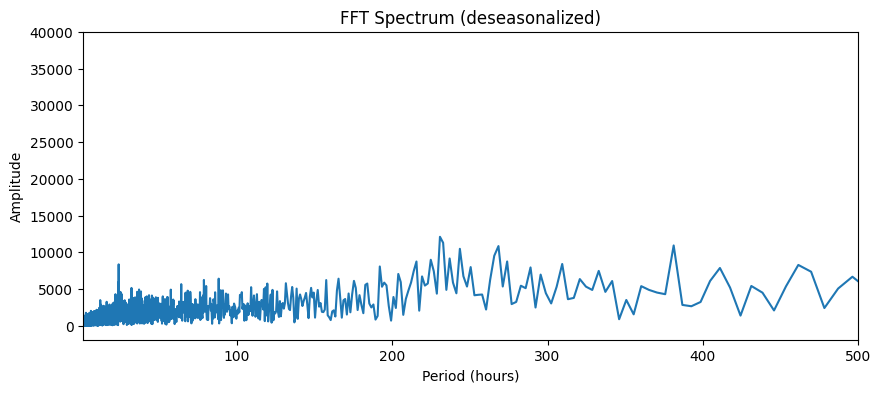

In [9]:
# FFT after deseasonalization to see remaining structure
y_fft = train_ds.interpolate(limit_direction='both')
y_fft = y_fft - y_fft.mean()

n = len(y_fft)
fft = np.fft.rfft(y_fft.values)
freq = np.fft.rfftfreq(n, d=1.0)  # hours
power = np.abs(fft)
period = np.where(freq > 0, 1 / freq, np.nan)

plt.figure(figsize=(10, 4))
plt.plot(period, power)
plt.xlim(1, 500)
plt.xlabel('Period (hours)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum (deseasonalized)')
plt.show()
